In [73]:
import pandas as pd

In [ ]:
#read the xslx file

In [ ]:
df = pd.read_excel(r'C:\Users\himan\Downloads\Datathon\UKSAT\data\contents\data.xlsx', sheet_name='All data')

<p>Instead of playing with the main all data sheet, I will play with the individual sheets
#each sheet is a reference to the source of the data i will make a list of all the dataframes according to the source reference</p>

In [ ]:
all_dfs_according_to_source_ref = []
for i in range(1,45):
    try:
        all_dfs_according_to_source_ref.append(pd.read_excel(r'C:\Users\himan\Downloads\Datathon\UKSAT\data\contents\data.xlsx', sheet_name=f'Ref #{i}'))
    except Exception as e:
        print(f"Error reading sheet Ref #{i}: {e}")
        continue

<p>Get all unique columns from all dataframes<br>I am creating a set of all columns across all dataframes and then I will create a new dataframe with all columns and fill in the values accordingly<br>
Get all unique columns from all dataframes</p>

In [ ]:


all_columns = set()
for df in all_dfs_according_to_source_ref:
    all_columns.update(df.columns)

# Create a dictionary to store column values
column_arrays = {col: [] for col in all_columns}

# Iterate through each dataframe and collect values for each column
for df in all_dfs_according_to_source_ref:
    for col in all_columns:
        if col in df.columns:
            column_arrays[col].extend(df[col].values)
        else:
            # If column doesn't exist in current df, extend with NaN values
            column_arrays[col].extend([None] * len(df))

# Create merged dataframe
merged_df = pd.DataFrame(column_arrays)

In [118]:
merged_df.dropna(how='all', inplace=True)  # Drop rows where all elements are NaN

In [ ]:
# just checking
uni_col = set()
for i in merged_df.columns:
    uni_col.add(i)
    
    

In [120]:
uni_col

{'Bulk density',
 'Clay (%)',
 'Coarse',
 'Coarse Fraction',
 'Coarse fragments (%)',
 'Depth (cm)',
 'Depth (in)',
 'Depth (inches)',
 'Depth (m)',
 'Depth (mm)',
 'Field/lab',
 'Fine',
 'Horizon',
 'Ksat',
 'Ksat Yes/No',
 'Medium',
 'Method',
 'Organic carbon',
 'Organic matter',
 'Other potentally relevant info',
 'Sample Height (cm)',
 'Sample Height (mm)',
 'Sample diameter (cm)',
 'Sample diameter (mm)',
 'Sand (%)',
 'Silt  (%)',
 'Site label',
 'Soil name',
 'Source reference',
 'Stdev_Bulk density',
 'Stdev_Clay (%)',
 'Stdev_Coarse_fragments (%)',
 'Stdev_Ksat',
 'Stdev_Organic carbon',
 'Stdev_Sand (%)',
 'Stdev_Silt  (%)',
 'Textural class',
 'Textural class.1',
 'Units',
 'Units.1',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Very coarse',
 'Very fine'}

I see a lot of unnamed Columns so i will drop them later

In [110]:
cols = merged_df.columns.tolist()

In [124]:
# Calculate missing values and percentage
missing_values = merged_df.isnull().sum()
total_rows = len(merged_df)
missing_percentages = (missing_values / total_rows) * 100

# Sort by percentage of missing values in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

print("Missing values percentage in each column:")
for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}%")

Missing values percentage in each column:
Stdev_Organic carbon: 100.00%
Textural class.1: 100.00%
Stdev_Coarse_fragments (%): 100.00%
Sample Height (mm): 99.99%
Depth (m): 99.99%
Sample diameter (mm): 99.99%
Stdev_Clay (%): 99.97%
Stdev_Silt  (%): 99.97%
Coarse fragments (%): 99.97%
Stdev_Sand (%): 99.95%
Depth (in): 99.94%
Coarse Fraction: 99.91%
Units.1: 99.89%
Depth (mm): 99.78%
Stdev_Bulk density: 99.66%
Organic matter: 99.65%
Other potentally relevant info: 99.54%
Stdev_Ksat: 99.40%
Depth (inches): 99.03%
Soil name: 91.24%
Ksat: 24.73%
Bulk density: 24.40%
Very coarse: 11.42%
Coarse: 11.15%
Medium: 11.15%
Fine: 11.15%
Organic carbon: 11.06%
Very fine: 11.00%
Textural class: 9.56%
Sand (%): 8.25%
Clay (%): 8.23%
Silt  (%): 8.23%
Horizon: 1.95%
Ksat Yes/No: 1.94%
Units: 1.62%
Depth (cm): 1.33%
Site label: 0.33%
Sample Height (cm): 0.11%
Field/lab: 0.08%
Sample diameter (cm): 0.08%
Source reference: 0.06%
Method: 0.06%


22 Column have less than 50% missing values, removing other columns

In [125]:
#Dropping columns with more than 50% missing values
threshold = 50
cols_to_drop = missing_percentages[missing_percentages > threshold].index
cleaned_df = merged_df.drop(columns=cols_to_drop)
print(f"Dropped columns with more than {threshold}% missing values: {cols_to_drop.tolist()}")

Dropped columns with more than 50% missing values: ['Stdev_Organic carbon', 'Textural class.1', 'Stdev_Coarse_fragments (%)', 'Sample Height (mm)', 'Depth (m)', 'Sample diameter (mm)', 'Stdev_Clay (%)', 'Stdev_Silt  (%)', 'Coarse fragments (%)', 'Stdev_Sand (%)', 'Depth (in)', 'Coarse Fraction', 'Units.1', 'Depth (mm)', 'Stdev_Bulk density', 'Organic matter', 'Other potentally relevant info', 'Stdev_Ksat', 'Depth (inches)', 'Soil name']


In [126]:
cleaned_df.to_csv('cleaned_data.csv', index=False)

In [ ]:
cleaned_df

In [ ]:
# Droping all columns containing 'Unnamed' in their name
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if 'Unnamed' in col])

In [122]:
merged_df.to_csv('merged_data.csv', index=False)

In [123]:
merged_df

,Sample diameter (cm),Stdev_Bulk density,Field/lab,Site label,Medium,Clay (%),Bulk density,Stdev_Clay (%),Fine,Sample Height (cm),...,Soil name,Coarse Fraction,Ksat Yes/No,Very fine,Ksat,Very coarse,Sample diameter (mm),Stdev_Silt (%),Units,Stdev_Ksat
0,5.4,NaN,Lab,I/1,5.2,14.8,1.24,NaN,6.3,4.0,...,Groseclose,NaN,NaN,4.9,7.63e-06,3.5,NaN,NaN,NaN,NaN
1,5.4,NaN,Lab,I/1,3.6,47.9,1.45,NaN,2.9,4.0,...,Groseclose,NaN,NaN,3.0,4.31e-06,2.9,NaN,NaN,NaN,NaN
2,5.4,NaN,Lab,I/2,5.2,12.6,1.35,NaN,5.5,4.0,...,Groseclose,NaN,NaN,5.2,3.74e-06,6.1,NaN,NaN,NaN,NaN
3,5.4,NaN,Lab,I/2,1.4,68.2,1.41,NaN,1.7,4.0,...,Groseclose,NaN,NaN,2.5,1.14e-08,1.6,NaN,NaN,NaN,NaN
4,5.4,NaN,Lab,I/3,4.9,13.9,1.25,NaN,6.5,4.0,...,Groseclose,NaN,NaN,3.0,1.45e-06,6.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428,2.5,NaN,lab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Plinthic Hapludox,NaN,NaN,NaN,9.8,NaN,NaN,NaN,NaN,NaN
27429,2.5,NaN,lab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Plinthic Hapludox,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN
27430,2.5,NaN,lab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Plinthic Hapludox,NaN,NaN,NaN,23.5,NaN,NaN,NaN,NaN,NaN
27431,NaN,NaN,lab,2,NaN,13.8,1.53,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.471367679271444e-06,NaN,NaN,NaN,NaN,0.000008


In [129]:
cleaned_df.columns.tolist()

['Sample diameter (cm)',
 'Field/lab',
 'Site label',
 'Medium',
 'Clay (%)',
 'Bulk density',
 'Fine',
 'Sample Height (cm)',
 'Sand (%)',
 'Silt  (%)',
 'Horizon',
 'Textural class',
 'Method',
 'Organic carbon',
 'Source reference',
 'Depth (cm)',
 'Coarse',
 'Ksat Yes/No',
 'Very fine',
 'Ksat',
 'Very coarse',
 'Units']

In [ ]:
#this is the final cleaned data frame that I will use for the analysis
# I will now use this cleaned data frame to create a random forest model to predict Ksat values
# but first i will identitfy the most important features that are used to predict Ksat values
# I will use the Random Forest Regressor from sklearn to do this
# The reason I chose this algorithm is becuase, the forest is a collection of decision trees, and it is very good at handling non-linear relationships and interactions between features.
# It also provides a measure of feature importance, which is what we are interested in here.
# I will also use the LabelEncoder from sklearn to convert categorical variables to numeric
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Convert Ksat values to numeric, removing any non-numeric characters
df = cleaned_df.copy()
df['Ksat'] = pd.to_numeric(df['Ksat'].astype(str).str.extract('(\d*\.?\d*)')[0], errors='coerce')

# Select features to use (excluding Ksat becuase that is the target variable and identifier columns)
features = ['Sample diameter (cm)', 'Bulk density', 'Clay (%)', 'Fine', 'Sand (%)', 
           'Silt  (%)', 'Organic carbon', 'Textural class', 'Method']

# Create copy of dataframe with selected features
X = df[features].copy()

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
categorical_cols = ['Textural class', 'Method']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Convert remaining columns to numeric, handling any non-numeric values
for col in X.columns:
    if col not in categorical_cols:
        X[col] = pd.to_numeric(X[col].astype(str).str.extract('(\d*\.?\d*)')[0], errors='coerce')

# Fill missing values with mean
X = X.fillna(X.mean())

# Get target variable
y = df['Ksat'].values

# Create and train RandomForest model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42, n_jobs=-1)
# Drop rows where Ksat is NaN
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Feature importance ranking:")
print(feature_importance)

Feature importance ranking:
                feature  importance
1          Bulk density    0.230529
6        Organic carbon    0.199922
4              Sand (%)    0.170186
3                  Fine    0.162829
2              Clay (%)    0.070471
7        Textural class    0.066148
0  Sample diameter (cm)    0.052857
5             Silt  (%)    0.042401
8                Method    0.004656


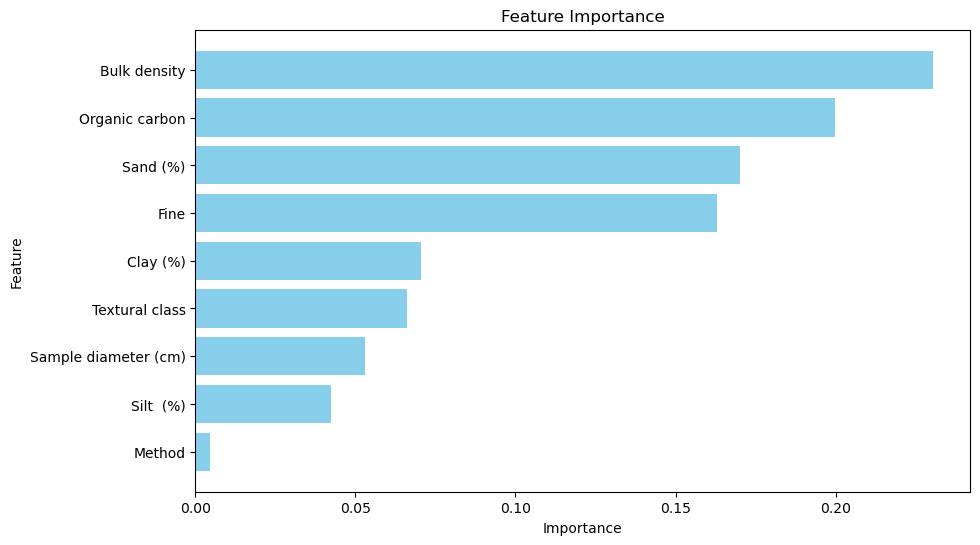

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [132]:
for feature in features:
    missing_count = cleaned_df[feature].isnull().sum()
    dtype = cleaned_df[feature].dtype
    missing_percentage = (missing_count / len(cleaned_df)) * 100
    print(f"Feature: {feature}")
    print(f"Data type: {dtype}")
    print(f"Missing values: {missing_count} ({missing_percentage:.2f}%)")
    print("-" * 50)

Feature: Sample diameter (cm)
Data type: float64
Missing values: 22 (0.08%)
--------------------------------------------------
Feature: Bulk density
Data type: object
Missing values: 6694 (24.40%)
--------------------------------------------------
Feature: Clay (%)
Data type: object
Missing values: 2259 (8.23%)
--------------------------------------------------
Feature: Fine
Data type: float64
Missing values: 3060 (11.15%)
--------------------------------------------------
Feature: Sand (%)
Data type: object
Missing values: 2262 (8.25%)
--------------------------------------------------
Feature: Silt  (%)
Data type: object
Missing values: 2259 (8.23%)
--------------------------------------------------
Feature: Organic carbon
Data type: float64
Missing values: 3035 (11.06%)
--------------------------------------------------
Feature: Textural class
Data type: object
Missing values: 2623 (9.56%)
--------------------------------------------------
Feature: Method
Data type: object
Missing v

In [ ]:
# Drop rows with any missing values just making sure
cleaned_df = cleaned_df.dropna()
print(f"Original shape: {cleaned_df.shape}")

Original shape: (18726, 22)


In [ ]:
cleaned_df.to_csv('cleaned_data.csv', index=False) #occasionally I will save the cleaned data frame to a csv file so that I can use it later without having to clean it again

In [ ]:
important_features_df = cleaned_df[feature_importance['feature'].tolist()]

In [137]:
important_features_df.to_csv('important_features.csv', index=False)

In [ ]:
important_features_df.head() #everything looks good but i do need to attach the ksat here

,Bulk density,Organic carbon,Sand (%),Fine,Clay (%),Textural class,Sample diameter (cm),Silt (%),Method
1256,1.47,0.78,94.4,45.8,2.3,S,3.0,3.3,Constant Head
1257,1.53,0.35,96.3,45.7,1.8,S,3.0,1.9,Constant Head
1258,1.54,0.32,96.5,44.9,1.6,S,3.0,1.9,Constant Head
1259,1.61,0.05,98.1,46.7,1.8,S,3.0,0.1,Constant Head
1260,1.64,0.05,97.9,47.3,1.9,S,3.0,0.2,Constant Head


In [ ]:
# adding back the ksat using the index
# Add the Ksat column from merged_df based on the index
important_features_df['Ksat'] = merged_df.loc[important_features_df.index, 'Ksat']

C:\Users\himan\AppData\Local\Temp\ipykernel_17780\4257020823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['Ksat'] = merged_df.loc[important_features_df.index, 'Ksat']


In [ ]:
important_features_df.to_csv('important_features_with_ksat.csv', index=False)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Convert features to numeric type and handle missing values
numeric_features = important_features_df.copy()
le = LabelEncoder()
categorical_cols = ['Method', 'Textural class']

for col in categorical_cols:
    numeric_features[col] = le.fit_transform(numeric_features[col].astype(str))

# Convert Ksat to numeric and clean the data
numeric_features['Ksat'] = pd.to_numeric(numeric_features['Ksat'].astype(str).str.extract('(\d*\.?\d*)')[0], errors='coerce')

# Remove rows with NaN values
numeric_features = numeric_features.dropna()

# Split features and target
X = numeric_features.drop('Ksat', axis=1)
y = numeric_features['Ksat']

# Split into training and testing sets
# 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid
# I will use RandomizedSearchCV to find the best hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomForest
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("CV Score Std:", cv_scores.std())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\himan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
153 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\himan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\himan\anaconda3\Lib\site-packag

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Squared Error: 263.7597947179666
R2 Score: 0.7536683487536988

Cross-validation scores: [0.78551351 0.67707293 0.69363738 0.81309709 0.84727874]
Mean CV Score: 0.7633199285651955
CV Score Std: 0.06680359938053934


In [148]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Convert features to numeric type and handle missing values
numeric_features = important_features_df.copy()
le = LabelEncoder()
categorical_cols = ['Method', 'Textural class']

for col in categorical_cols:
    numeric_features[col] = le.fit_transform(numeric_features[col].astype(str))

# Convert Ksat to numeric and clean the data
numeric_features['Ksat'] = pd.to_numeric(numeric_features['Ksat'].astype(str).str.extract('(\d*\.?\d*)')[0], errors='coerce')

# Remove rows with NaN values
numeric_features = numeric_features.dropna()

# Split features and target
X = numeric_features.drop('Ksat', axis=1)
y = numeric_features['Ksat']

# Split into training and testing sets
# 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid
# I will use RandomizedSearchCV to find the best hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# Initialize RandomForest
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("CV Score Std:", cv_scores.std())

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Squared Error: 263.7597947179666
R2 Score: 0.7536683487536988

Cross-validation scores: [0.78551351 0.67707293 0.69363738 0.81309709 0.84727874]
Mean CV Score: 0.7633199285651955
CV Score Std: 0.06680359938053934


Sample size: 2000, RMSLE: 0.8311, R²: 0.5574
Sample size: 4000, RMSLE: 0.7701, R²: 0.6272
Sample size: 6000, RMSLE: 0.7286, R²: 0.6570
Sample size: 8000, RMSLE: 0.7019, R²: 0.6939
Sample size: 10000, RMSLE: 0.6695, R²: 0.7169
Sample size: 12000, RMSLE: 0.6370, R²: 0.7299
Sample size: 14000, RMSLE: 0.6116, R²: 0.7312
Sample size: 16000, RMSLE: 0.5881, R²: 0.7566
Sample size: 18000, RMSLE: 0.5615, R²: 0.7771
Sample size: 18726, RMSLE: 0.5522, R²: 0.7962


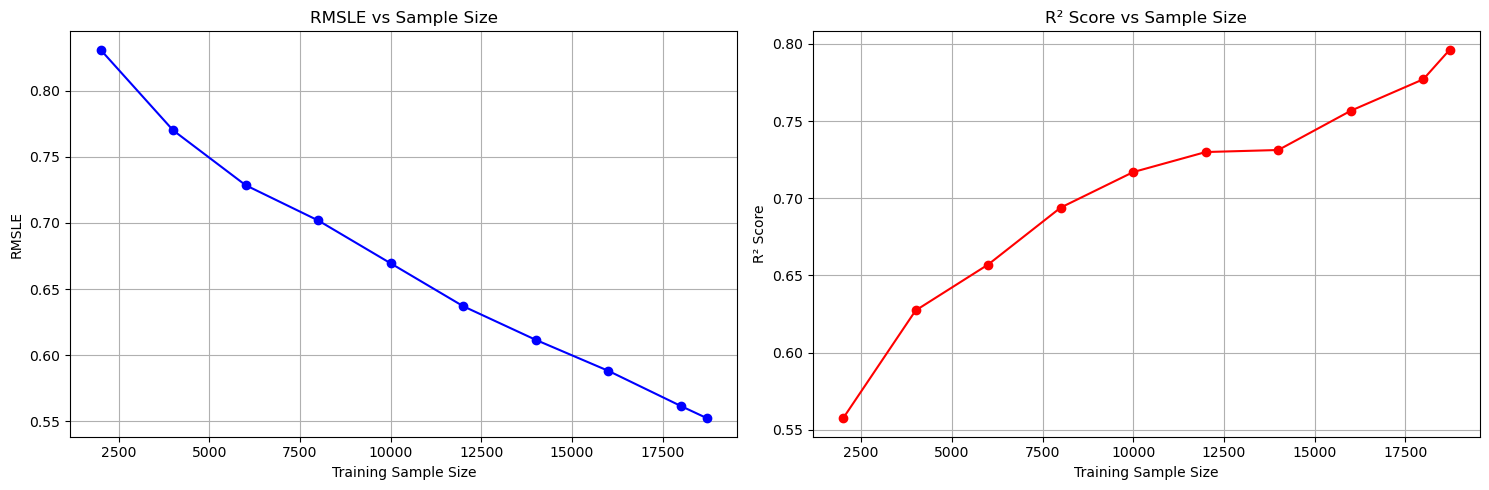

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

def rmsle(y_true, y_pred):
    # Add 1 to avoid log(0)
    return np.sqrt(np.mean(np.power(np.log1p(y_true) - np.log1p(y_pred), 2)))

def train_and_evaluate(X, y, n_samples, n_iterations=50):
    rmsle_scores = []
    r2_values = []  # 
    
    for _ in range(n_iterations):
        # Randomly sample data
        if n_samples < len(X):
            idx = np.random.choice(len(X), n_samples, replace=False)
            X_subset = X[idx]
            y_subset = y[idx]
        else:
            X_subset = X
            y_subset = y
            
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=None)
        
        # Train model using the best parameters found in the hyperparameter tuning step
        rf = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42, n_jobs=-1, min_samples_leaf=1, min_samples_split=2, max_features='sqrt')
        rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf.predict(X_test)
        
        # Calculate metrics
        rmsle_scores.append(rmsle(y_test, y_pred))
        r2_values.append(r2_score(y_test, y_pred))
    
    return np.mean(rmsle_scores), np.mean(r2_values)

# Prepare data (using the previously prepared numeric_features DataFrame)
X = numeric_features.drop('Ksat', axis=1)
y = numeric_features['Ksat']

# Convert to numpy arrays
X = X.values
y = y.values

# Define sample sizes
sample_sizes = np.arange(2000, len(X)+1, 2000)
if sample_sizes[-1] != len(X):
    sample_sizes = np.append(sample_sizes, len(X))

# Storage for results
mean_rmsle_scores = []
mean_r2_scores = []

# Run experiments for each sample size
for n_samples in sample_sizes:
    rmsle_val, r2_val = train_and_evaluate(X, y, n_samples)  # renamed variables
    mean_rmsle_scores.append(rmsle_val)
    mean_r2_scores.append(r2_val)
    print(f"Sample size: {n_samples}, RMSLE: {rmsle_val:.4f}, R²: {r2_val:.4f}")

# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot RMSLE
ax1.plot(sample_sizes, mean_rmsle_scores, 'b-', marker='o')
ax1.set_xlabel('Training Sample Size')
ax1.set_ylabel('RMSLE')
ax1.set_title('RMSLE vs Sample Size')
ax1.grid(True)

# Plot R²
ax2.plot(sample_sizes, mean_r2_scores, 'r-', marker='o')
ax2.set_xlabel('Training Sample Size')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Score vs Sample Size')
ax2.grid(True)

plt.tight_layout()
plt.show()
We can see that our R2 is going up as we increase the samples size and it hasnt quite platued yet, so if we had more data we could probably make the model even better